In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  



In [3]:
data_set = pd.read_excel('/Users/simranrao/Downloads/Crop_recommendation.xlsx')


In [4]:
data_set.head(100)



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576693,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [5]:
data_set.size


17600

In [6]:
data_set.shape


(2200, 8)

In [7]:
data_set.count()


N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [8]:
data_set['label'].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
data_set.columns



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
missing_values = data_set.isnull().sum()


In [11]:
missing_values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
data_set

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


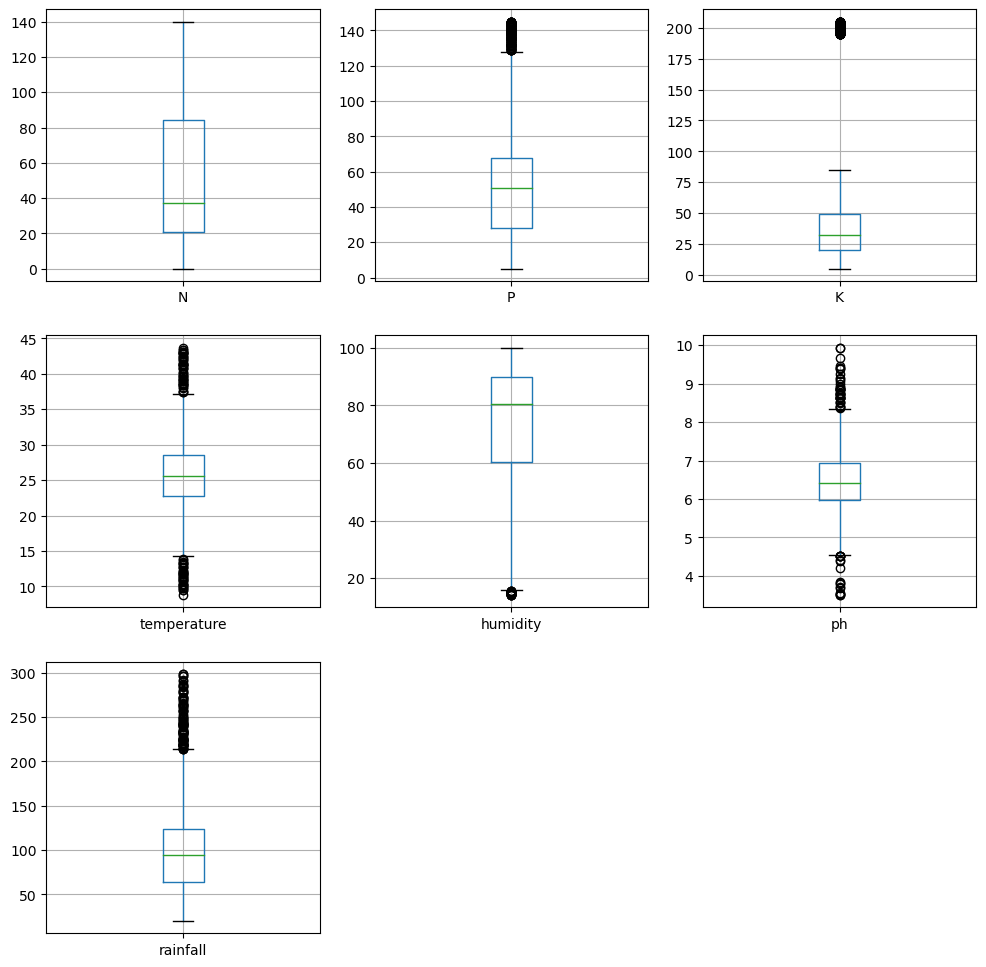

In [12]:
plt.figure(figsize=(12,12))
i=1
for col in data_set.iloc[:,:-1]:
    plt.subplot(3,3,i)
    data_set[[col]].boxplot()
    i+=1

In [13]:
# Calculate Q1, Q3, and IQR for all columns except the last one
Q1 = data_set.iloc[:, :-1].quantile(0.25)
Q3 = data_set.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are NOT outliers
mask = ~((data_set.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (data_set.iloc[:, :-1] > (Q3 + 1.5 * IQR)))

# Apply the mask to df, keeping all rows in the last column
data_set_no_outliers = data_set[mask.all(axis=1)]
data_set_no_outliers

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:

# Separate the features from the labels
features = data_set_no_outliers.iloc[:, :-1]
labels = data_set_no_outliers.iloc[:, -1]

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
data_set_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the labels back into the DataFrame
data_set_scaled['label'] = labels.values
data_set_scaled

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.411111,0.4750,0.286836,0.786537,0.515697,0.946048,rice
1,0.664286,0.566667,0.3875,0.424416,0.787180,0.642575,0.854623,rice
2,0.671429,0.500000,0.4000,0.496859,0.770640,0.632999,0.980486,rice
3,0.650000,0.333333,0.4250,0.414715,0.767724,0.639019,0.963266,rice
4,0.635714,0.444444,0.3875,0.306376,0.768395,0.499748,0.855763,rice
...,...,...,...,...,...,...,...,...
1763,0.764286,0.322222,0.3375,0.545515,0.601446,0.588729,0.815778,coffee
1764,0.707143,0.111111,0.2750,0.573708,0.485366,0.406032,0.557682,coffee
1765,0.842857,0.311111,0.3125,0.429542,0.611085,0.478696,0.792729,coffee
1766,0.835714,0.300000,0.3625,0.523476,0.431832,0.583122,0.553802,coffee


In [16]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to your scaled features and labels
svm_classifier.fit(data_set_scaled.drop('label', axis=1), data_set_scaled['label'])

# Use SelectFromModel to select features based on the SVM coefficients
feature_selector = SelectFromModel(svm_classifier, prefit=True)

# Transform the features to select only the important ones
selected_features = feature_selector.transform(data_set_scaled.drop('label', axis=1))

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = data_set_scaled.drop('label', axis=1).columns[selected_feature_indices]

# Create a DataFrame with only the selected features
selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_names)

# Add the labels back into the DataFrame
selected_features_df['label'] = data_set_scaled['label'].values

# Display the DataFrame with selected features
print(selected_features_df)


             N         P       K  humidity  rainfall   label
0     0.642857  0.411111  0.4750  0.786537  0.946048    rice
1     0.664286  0.566667  0.3875  0.787180  0.854623    rice
2     0.671429  0.500000  0.4000  0.770640  0.980486    rice
3     0.650000  0.333333  0.4250  0.767724  0.963266    rice
4     0.635714  0.444444  0.3875  0.768395  0.855763    rice
...        ...       ...     ...       ...       ...     ...
1763  0.764286  0.322222  0.3375  0.601446  0.815778  coffee
1764  0.707143  0.111111  0.2750  0.485366  0.557682  coffee
1765  0.842857  0.311111  0.3125  0.611085  0.792729  coffee
1766  0.835714  0.300000  0.3625  0.431832  0.553802  coffee
1767  0.742857  0.144444  0.3125  0.530009  0.625053  coffee

[1768 rows x 6 columns]


/Users/simranrao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Class distribution:
label
banana         100
lentil         100
jute           100
cotton         100
muskmelon      100
watermelon     100
maize          100
pomegranate    100
coffee         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        58
papaya          54
rice            32
Name: count, dtype: int64


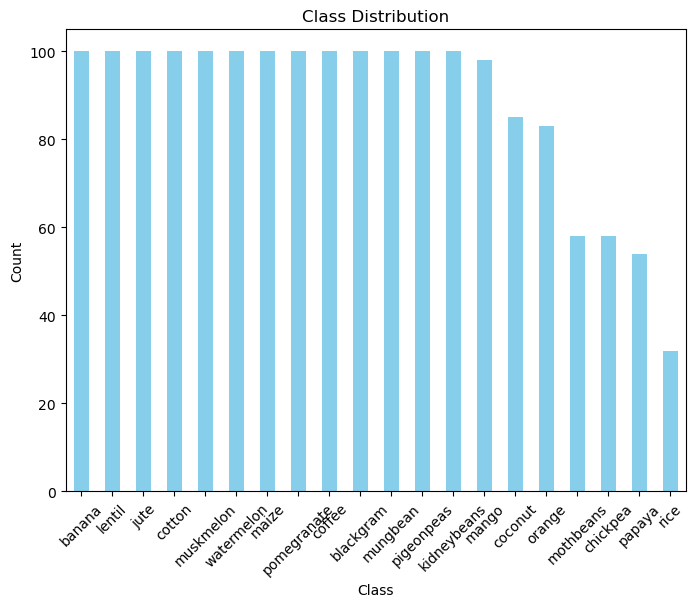

In [17]:
import matplotlib.pyplot as plt

# Assuming 'data_set_scaled' contains your preprocessed dataset
labels = data_set_scaled['label']

# Calculate class distribution
class_distribution = labels.value_counts()

# Print class distribution
print("Class distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'data_set_scaled' contains your preprocessed dataset
X = data_set_scaled.drop('label', axis=1)
y = data_set_scaled['label']

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution before oversampling: Counter({'maize': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'watermelon': 100, 'muskmelon': 100, 'cotton': 100, 'jute': 100, 'coffee': 100, 'mango': 98, 'coconut': 85, 'orange': 83, 'chickpea': 58, 'mothbeans': 58, 'papaya': 54, 'rice': 32})
Class distribution after oversampling: Counter({'rice': 100, 'maize': 100, 'chickpea': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mothbeans': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'mango': 100, 'watermelon': 100, 'muskmelon': 100, 'orange': 100, 'papaya': 100, 'coconut': 100, 'cotton': 100, 'jute': 100, 'coffee': 100})


Class distribution:
label
banana         100
lentil         100
jute           100
cotton         100
muskmelon      100
watermelon     100
maize          100
pomegranate    100
coffee         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        58
papaya          54
rice            32
Name: count, dtype: int64


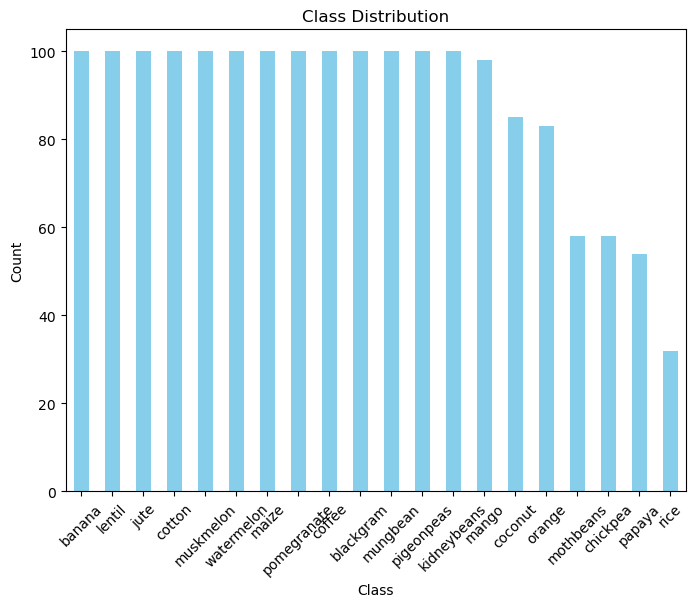

In [20]:
import matplotlib.pyplot as plt

# Assuming 'data_set_scaled' contains your preprocessed dataset
labels = data_set_scaled['label']

# Calculate class distribution
class_distribution = labels.value_counts()

# Print class distribution
print("Class distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


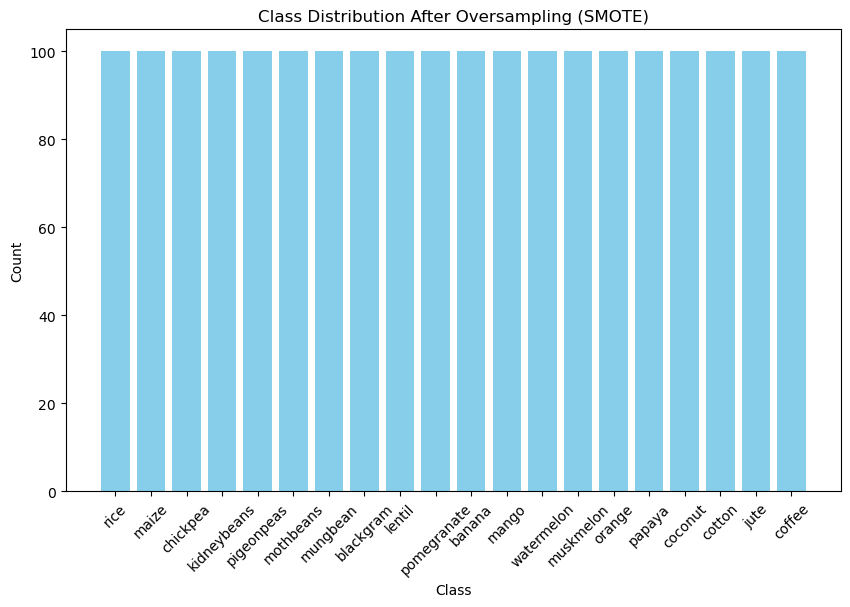

In [21]:
import matplotlib.pyplot as plt

# Class labels and their counts after oversampling
class_labels = list(Counter(y_resampled).keys())
class_counts = list(Counter(y_resampled).values())

# Plot class distribution after oversampling
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution After Oversampling (SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X_resampled' and 'y_resampled' contain the balanced features and labels after applying SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9625
Classification Report:
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        18
   blackgram       0.96      0.96      0.96        24
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        23
      cotton       0.93      1.00      0.96        26
        jute       0.94      0.67      0.78        24
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.82      1.00      0.90        14
       maize       1.00      0.91      0.95        23
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.88      0.94        17
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00      1.00      1.00        21
  pigeonpeas       1.00      0.96      0.

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf']  # Kernel type
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validated accuracy
best_accuracy = grid_search.best_score_
print("Best Cross-Validated Accuracy:", best_accuracy)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Best Hyperparameters:", accuracy)


Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.9881250000000001
Test Set Accuracy with Best Hyperparameters: 0.9725


In [28]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Initialize RFE with the SVM classifier and the number of desired features
num_features_to_select = 5  # Choose the number of features you want to select
rfe = RFE(estimator=svm_classifier, n_features_to_select=num_features_to_select)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = features.columns[rfe.support_]

# Transform the training and test data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the classifier using only the selected features
svm_classifier_selected = SVC(kernel='linear', random_state=42)
svm_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the classifier with selected features
y_pred_selected = svm_classifier_selected.predict(X_test_selected)

# Evaluate the performance of the classifier with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)


Accuracy with selected features: 0.9325


In [30]:
# Extract support vectors and their coefficients
support_vectors = best_model.support_vectors_
dual_coefficients = best_model.dual_coef_
feature_names = data_set_scaled.drop('label', axis=1).columns

# Map support vectors to original feature space
original_support_vectors = scaler.inverse_transform(support_vectors)

# Create a dictionary to store feature names and their corresponding support vector coefficients
support_vectors_dict = {}
for i, vector in enumerate(original_support_vectors):
    for j, value in enumerate(vector):
        feature_name = feature_names[j]
        if feature_name not in support_vectors_dict:
            support_vectors_dict[feature_name] = []
        support_vectors_dict[feature_name].append(dual_coefficients[0][i])

# Calculate the average coefficient for each feature across support vectors
average_coefficients = {feature: sum(values) / len(values) for feature, values in support_vectors_dict.items()}

# Sort the coefficients by absolute value (for easier interpretation)
sorted_average_coefficients = sorted(average_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top features contributing to the predictions
print("Top features contributing to predictions:")
for feature, coef in sorted_average_coefficients:
    print(f"{feature}: {coef}")


Top features contributing to predictions:
N: -0.20355026140186624
P: -0.20355026140186624
K: -0.20355026140186624
temperature: -0.20355026140186624
humidity: -0.20355026140186624
ph: -0.20355026140186624
rainfall: -0.20355026140186624


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9725
Precision: 0.9747256427707199
Recall: 0.9725
F1-score: 0.9723286340565427
Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 19  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0 

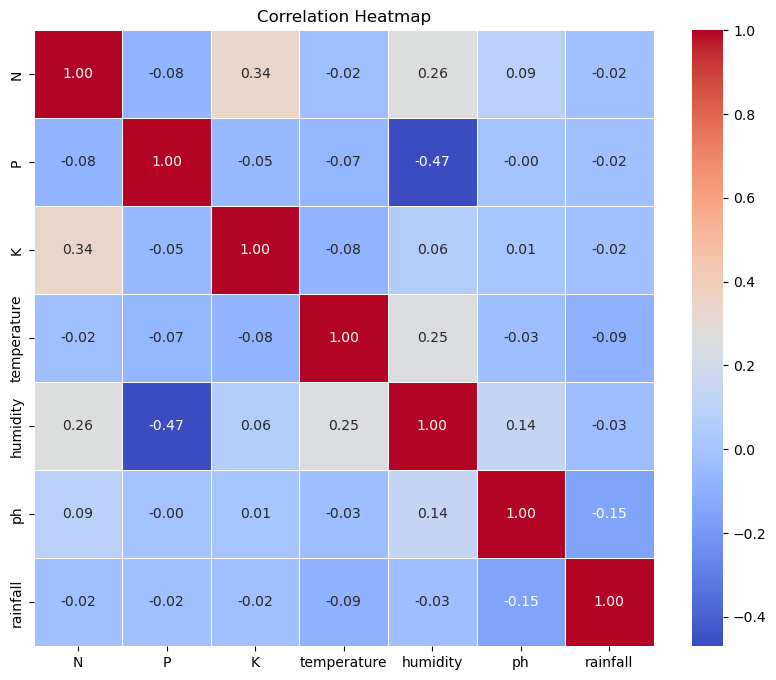

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data_set_scaled.drop('label', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


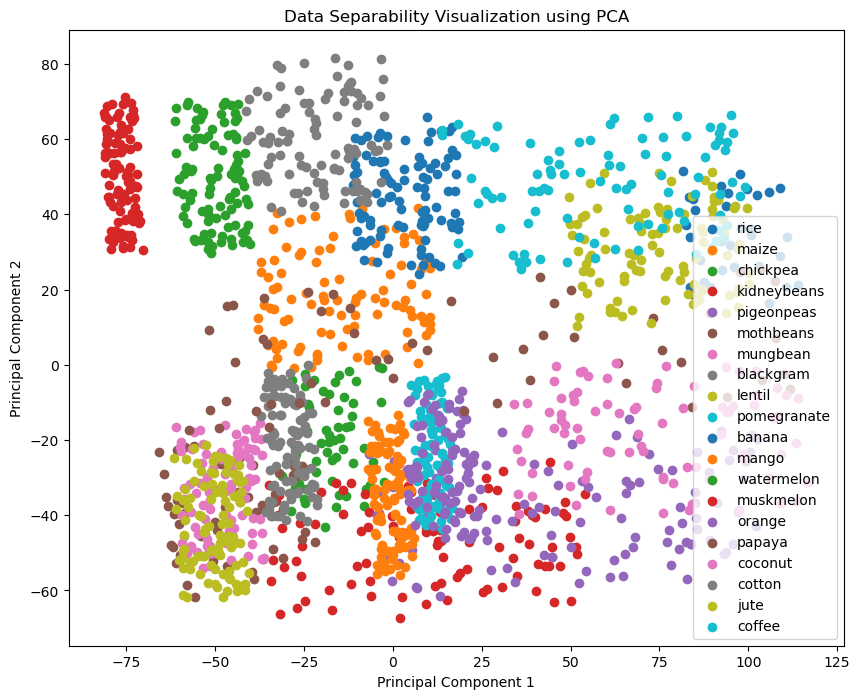

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Plot the data points in the reduced space
plt.figure(figsize=(10, 8))
for label in data_set_scaled['label'].unique():
    plt.scatter(X_pca[data_set_scaled['label'] == label, 0], X_pca[data_set_scaled['label'] == label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Separability Visualization using PCA')
plt.legend()
plt.show()


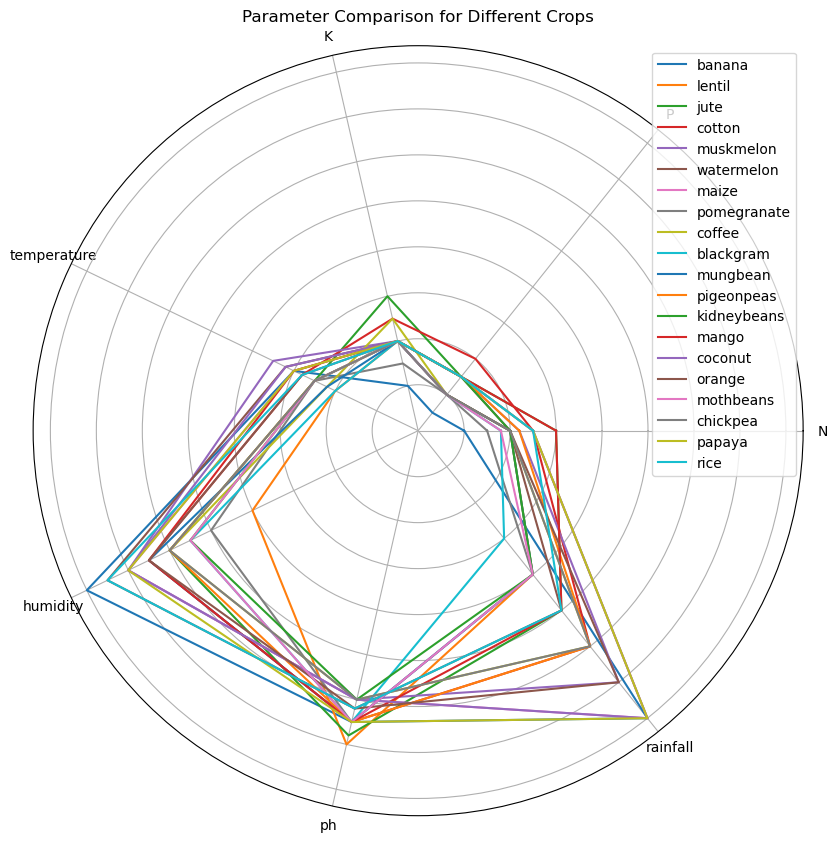

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define crops and their parameter values
crops = ['banana', 'lentil', 'jute', 'cotton', 'muskmelon', 'watermelon', 'maize', 'pomegranate', 'coffee', 'blackgram',
         'mungbean', 'pigeonpeas', 'kidneybeans', 'mango', 'coconut', 'orange', 'mothbeans', 'chickpea', 'papaya', 'rice']
parameter_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
parameter_values = {
    'banana': [0.1, 0.05, 0.1, 0.3, 0.8, 0.65, 0.8],
    'lentil': [0.2, 0.1, 0.2, 0.2, 0.4, 0.7, 0.4],
    'jute': [0.3, 0.15, 0.3, 0.25, 0.6, 0.68, 0.5],
    'cotton': [0.25, 0.2, 0.25, 0.28, 0.65, 0.65, 0.6],
    'muskmelon': [0.22, 0.15, 0.2, 0.35, 0.7, 0.6, 0.7],
    'watermelon': [0.2, 0.15, 0.2, 0.32, 0.75, 0.62, 0.5],
    'maize': [0.25, 0.15, 0.2, 0.3, 0.7, 0.6, 0.8],
    'pomegranate': [0.15, 0.1, 0.15, 0.25, 0.5, 0.65, 0.4],
    'coffee': [0.2, 0.1, 0.25, 0.22, 0.6, 0.6, 0.6],
    'blackgram': [0.18, 0.1, 0.2, 0.2, 0.55, 0.65, 0.3],
    'mungbean': [0.2, 0.1, 0.2, 0.22, 0.65, 0.65, 0.4],
    'pigeonpeas': [0.22, 0.15, 0.2, 0.25, 0.6, 0.65, 0.6],
    'kidneybeans': [0.2, 0.15, 0.2, 0.25, 0.55, 0.6, 0.4],
    'mango': [0.3, 0.15, 0.2, 0.3, 0.65, 0.65, 0.5],
    'coconut': [0.25, 0.15, 0.2, 0.32, 0.7, 0.6, 0.8],
    'orange': [0.2, 0.1, 0.2, 0.28, 0.65, 0.62, 0.7],
    'mothbeans': [0.18, 0.1, 0.2, 0.25, 0.55, 0.65, 0.4],
    'chickpea': [0.2, 0.1, 0.2, 0.25, 0.6, 0.6, 0.6],
    'papaya': [0.25, 0.15, 0.2, 0.3, 0.7, 0.65, 0.8],
    'rice': [0.25, 0.15, 0.2, 0.28, 0.75, 0.62, 0.5]
}

# Convert parameter values to numpy array
parameter_array = np.array([parameter_values[crop] for crop in crops])

# Number of parameters
num_parameters = len(parameter_names)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_parameters, endpoint=False).tolist()

# Make the plot close to a circle
parameter_array = np.concatenate((parameter_array, parameter_array[:,[0]]), axis=1)
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for i, (crop, values) in enumerate(zip(crops, parameter_array)):
    ax.plot(angles, values, label=crop)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(parameter_names)
ax.legend()
plt.title('Parameter Comparison for Different Crops')
plt.show()


In [38]:
def predict_best_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Hardcoded feature values
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Scale the features using Min-Max scaling (if necessary)
    # scaled_features = scaler.transform(features)
    
    # Predict the crop using the trained SVM model
    predicted_crop = best_model.predict(features)
    
    return predicted_crop[0]


In [69]:
# Example usage
best_crop = predict_best_crop(N=0.5, P=0.6, K=0.7, temperature=0.2, humidity=0.9, ph=0.2, rainfall=100)
print("Predicted best-suited crop:", best_crop)


Predicted best-suited crop: pigeonpeas


/Users/simranrao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
